In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
ls data

air_reserve.csv        date_info.csv          sample_submission.csv
air_store_info.csv     hpg_reserve.csv        store_id_relation.csv
air_visit_data.csv     hpg_store_info.csv


In [3]:
df_ar = pd.read_csv('data/air_reserve.csv')
df_ar.shape

(92378, 4)

In [4]:
df_ar.head(10)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2


**air_reserve.csv**

- air_store_id - the restaurant's id in the air system
- visit_datetime - the time of the reservation
- reserve_datetime - the time the reservation was made
- reserve_visitors - the number of visitors for that reservation

In [5]:
df_hr = pd.read_csv('data/hpg_reserve.csv')
df_hr.shape

(2000320, 4)

In [6]:
df_hr.head(15)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
5,hpg_28bdf7a336ec6a7b,2016-01-01 17:00:00,2016-01-01 15:00:00,2
6,hpg_2a01a042bca04ad9,2016-01-01 17:00:00,2016-01-01 17:00:00,2
7,hpg_2a84dd9f4c140b82,2016-01-01 17:00:00,2016-01-01 15:00:00,2
8,hpg_2ad179871696901f,2016-01-01 17:00:00,2016-01-01 13:00:00,2
9,hpg_2c1d989eedb0ff83,2016-01-01 17:00:00,2016-01-01 15:00:00,6


**hpg_reserve**

This file contains reservations made in the hpg system.

- hpg_store_id - the restaurant's id in the hpg system
- visit_datetime - the time of the reservation
- reserve_datetime - the time the reservation was made
- reserve_visitors - the number of visitors for that reservation

In [7]:
df_astore = pd.read_csv('data/air_store_info.csv')
df_astore.shape

(829, 5)

In [8]:
df_astore.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


This file contains information about select air restaurants. Column names and contents are self-explanatory.

- air_store_id
- air_genre_name
- air_area_name
- latitude
- longitude

In [9]:
df_hstore = pd.read_csv('data/hpg_store_info.csv')
df_hstore.shape

(4690, 5)

In [10]:
df_hstore.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


**hpg_store_info.csv**

This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

- hpg_store_id
- hpg_genre_name
- hpg_area_name
- latitude
- longitude

In [11]:
df_storeid = pd.read_csv('data/store_id_relation.csv')
df_storeid.shape

(150, 2)

In [12]:
df_storeid.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [13]:
df_av = pd.read_csv('data/air_visit_data.csv')
df_av.shape

(252108, 3)

In [14]:
df_av.head(15)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
5,air_ba937bf13d40fb24,2016-01-19,9
6,air_ba937bf13d40fb24,2016-01-20,31
7,air_ba937bf13d40fb24,2016-01-21,21
8,air_ba937bf13d40fb24,2016-01-22,18
9,air_ba937bf13d40fb24,2016-01-23,26


**air_visit_data.csv**

This file contains historical visit data for the air restaurants.

- air_store_id
- visit_date - the date
- visitors - the number of visitors to the restaurant on the date

In [15]:
date_info = pd.read_csv('data/date_info.csv')
date_info.shape

(517, 3)

In [16]:
date_info.head(15)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
5,2016-01-06,Wednesday,0
6,2016-01-07,Thursday,0
7,2016-01-08,Friday,0
8,2016-01-09,Saturday,0
9,2016-01-10,Sunday,0


## Thoughts:

- groupby everyday sum visitors
- calculate average by weekdays, holidays
- time_series? 

In [17]:
df_ar.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [18]:
df_ar['visit_date'] = df_ar['visit_datetime'].apply(lambda x: x[:10])

In [19]:
df_ar_visit = df_ar.groupby(['air_store_id','visit_date'])['reserve_visitors'].sum().reset_index()
df_ar_visit.head()

,air_store_id,visit_date,reserve_visitors
0,air_00a91d42b08b08d9,2016-10-31,2
1,air_00a91d42b08b08d9,2016-12-05,9
2,air_00a91d42b08b08d9,2016-12-14,18
3,air_00a91d42b08b08d9,2016-12-17,2
4,air_00a91d42b08b08d9,2016-12-20,4


In [20]:
df_ar_visit = df_ar_visit.merge(df_astore, on = 'air_store_id', how='left')
df_ar_visit.head(10)

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-10-31,2,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-12-05,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016-12-14,18,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016-12-17,2,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016-12-20,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
5,air_00a91d42b08b08d9,2017-02-18,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
6,air_00a91d42b08b08d9,2017-02-23,12,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
7,air_00a91d42b08b08d9,2017-03-01,3,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
8,air_00a91d42b08b08d9,2017-03-14,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
9,air_00a91d42b08b08d9,2017-03-21,3,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [21]:
df_ar_visit[df_ar_visit.air_store_id == 'air_00a91d42b08b08d9']

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-10-31,2,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-12-05,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016-12-14,18,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016-12-17,2,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016-12-20,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
5,air_00a91d42b08b08d9,2017-02-18,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
6,air_00a91d42b08b08d9,2017-02-23,12,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
7,air_00a91d42b08b08d9,2017-03-01,3,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
8,air_00a91d42b08b08d9,2017-03-14,4,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
9,air_00a91d42b08b08d9,2017-03-21,3,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [22]:
df_ar_visit[df_ar_visit.air_store_id == 'air_877f79706adbfb06']

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
17145,air_877f79706adbfb06,2016-01-01,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17146,air_877f79706adbfb06,2016-01-02,4,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17147,air_877f79706adbfb06,2016-01-08,7,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17148,air_877f79706adbfb06,2016-01-09,8,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17149,air_877f79706adbfb06,2016-01-12,6,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17150,air_877f79706adbfb06,2016-01-13,8,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17151,air_877f79706adbfb06,2016-01-14,8,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17152,air_877f79706adbfb06,2016-01-15,19,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17153,air_877f79706adbfb06,2016-01-16,8,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
17154,air_877f79706adbfb06,2016-01-18,21,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [23]:
df_av[df_av.air_store_id == 'air_877f79706adbfb06']

,air_store_id,visit_date,visitors
74720,air_877f79706adbfb06,2016-01-01,3
74721,air_877f79706adbfb06,2016-01-02,12
74722,air_877f79706adbfb06,2016-01-08,17
74723,air_877f79706adbfb06,2016-01-09,8
74724,air_877f79706adbfb06,2016-01-12,15
74725,air_877f79706adbfb06,2016-01-13,17
74726,air_877f79706adbfb06,2016-01-14,15
74727,air_877f79706adbfb06,2016-01-15,19
74728,air_877f79706adbfb06,2016-01-16,8
74729,air_877f79706adbfb06,2016-01-18,25


In [24]:
df_hr['visit_date'] = df_hr['visit_datetime'].apply(lambda x: x[:10])
df_hr.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016-01-01
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016-01-01
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016-01-01
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016-01-01
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016-01-01


In [25]:
df_hr_visit = df_hr.groupby(['hpg_store_id','visit_date'])['reserve_visitors'].sum().reset_index()
df_hr_visit.head()

,hpg_store_id,visit_date,reserve_visitors
0,hpg_001112ef76b9802c,2016-02-26,9
1,hpg_001112ef76b9802c,2016-03-17,3
2,hpg_001112ef76b9802c,2016-03-31,5
3,hpg_001112ef76b9802c,2016-04-05,13
4,hpg_001112ef76b9802c,2016-04-18,9


In [26]:
df_hr_visit = df_hr_visit.merge(df_hstore, on = 'hpg_store_id', how='left')
df_hr_visit.head(10)

,hpg_store_id,visit_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_001112ef76b9802c,2016-02-26,9,NaN,NaN,NaN,NaN
1,hpg_001112ef76b9802c,2016-03-17,3,NaN,NaN,NaN,NaN
2,hpg_001112ef76b9802c,2016-03-31,5,NaN,NaN,NaN,NaN
3,hpg_001112ef76b9802c,2016-04-05,13,NaN,NaN,NaN,NaN
4,hpg_001112ef76b9802c,2016-04-18,9,NaN,NaN,NaN,NaN
5,hpg_001112ef76b9802c,2016-07-05,3,NaN,NaN,NaN,NaN
6,hpg_001112ef76b9802c,2016-07-14,5,NaN,NaN,NaN,NaN
7,hpg_001112ef76b9802c,2016-07-21,3,NaN,NaN,NaN,NaN
8,hpg_001112ef76b9802c,2016-07-26,3,NaN,NaN,NaN,NaN
9,hpg_001112ef76b9802c,2016-07-28,3,NaN,NaN,NaN,NaN


In [27]:
df_hr_visit = df_hr_visit.merge(df_storeid, on = 'hpg_store_id', how = 'left')
df_hr_visit.head(15)

,hpg_store_id,visit_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id
0,hpg_001112ef76b9802c,2016-02-26,9,NaN,NaN,NaN,NaN,NaN
1,hpg_001112ef76b9802c,2016-03-17,3,NaN,NaN,NaN,NaN,NaN
2,hpg_001112ef76b9802c,2016-03-31,5,NaN,NaN,NaN,NaN,NaN
3,hpg_001112ef76b9802c,2016-04-05,13,NaN,NaN,NaN,NaN,NaN
4,hpg_001112ef76b9802c,2016-04-18,9,NaN,NaN,NaN,NaN,NaN
5,hpg_001112ef76b9802c,2016-07-05,3,NaN,NaN,NaN,NaN,NaN
6,hpg_001112ef76b9802c,2016-07-14,5,NaN,NaN,NaN,NaN,NaN
7,hpg_001112ef76b9802c,2016-07-21,3,NaN,NaN,NaN,NaN,NaN
8,hpg_001112ef76b9802c,2016-07-26,3,NaN,NaN,NaN,NaN,NaN
9,hpg_001112ef76b9802c,2016-07-28,3,NaN,NaN,NaN,NaN,NaN


In [28]:
df_hr_visit.shape

(1355053, 8)

In [29]:
df_hr_visit.isnull().sum()

hpg_store_id              0
visit_date                0
reserve_visitors          0
hpg_genre_name       793944
hpg_area_name        793944
latitude             793944
longitude            793944
air_store_id        1336433
dtype: int64

In [30]:
df_hr_visit = df_hr_visit[df_hr_visit.air_store_id.notnull()]
df_hr_visit.head(20)

,hpg_store_id,visit_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id
8717,hpg_0183ec352e38903c,2016-01-09,2,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8718,hpg_0183ec352e38903c,2016-01-11,8,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8719,hpg_0183ec352e38903c,2016-01-14,11,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8720,hpg_0183ec352e38903c,2016-01-15,8,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8721,hpg_0183ec352e38903c,2016-01-18,9,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8722,hpg_0183ec352e38903c,2016-01-28,9,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8723,hpg_0183ec352e38903c,2016-02-10,5,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8724,hpg_0183ec352e38903c,2016-02-12,2,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8725,hpg_0183ec352e38903c,2016-02-13,7,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f
8726,hpg_0183ec352e38903c,2016-02-21,2,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425,air_cbe867adcf44e14f


In [31]:
df_storeid[df_storeid.air_store_id == 'air_cbe867adcf44e14f']

,air_store_id,hpg_store_id
134,air_cbe867adcf44e14f,hpg_0183ec352e38903c


In [32]:
df_ar_visit[df_ar_visit.air_store_id == 'air_cbe867adcf44e14f']

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
24578,air_cbe867adcf44e14f,2017-03-03,7,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24579,air_cbe867adcf44e14f,2017-03-04,34,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24580,air_cbe867adcf44e14f,2017-03-10,10,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24581,air_cbe867adcf44e14f,2017-03-11,28,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24582,air_cbe867adcf44e14f,2017-03-13,8,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24583,air_cbe867adcf44e14f,2017-03-17,41,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24584,air_cbe867adcf44e14f,2017-03-18,13,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24585,air_cbe867adcf44e14f,2017-03-19,3,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24586,air_cbe867adcf44e14f,2017-03-20,4,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923
24587,air_cbe867adcf44e14f,2017-03-22,2,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923


Why they are differnet restaurant? 

Double check

In [33]:
df_storeid[df_storeid.air_store_id == 'air_cbe867adcf44e14f']

,air_store_id,hpg_store_id
134,air_cbe867adcf44e14f,hpg_0183ec352e38903c


In [34]:
df_hstore[df_hstore.hpg_store_id == 'hpg_0183ec352e38903c']

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
3347,hpg_0183ec352e38903c,Creation,Fukuoka-ken Kitakyūshū-shi Aoyama,33.86184,130.751425


In [35]:
df_astore[df_astore.air_store_id == 'air_cbe867adcf44e14f']

,air_store_id,air_genre_name,air_area_name,latitude,longitude
506,air_cbe867adcf44e14f,Izakaya,Fukuoka-ken Kitakyūshū-shi None,33.866465,130.764923


# TODO

- For both df_ar_visit and df_hr_visit, select restaurants which need to be predicted
- Add weekdays and holiday flag

- First directly use df_av for prediction

In [36]:
# How much restaurants need to be predicted?

df_submission = pd.read_csv('data/sample_submission.csv')
df_submission.shape

(32019, 2)

In [37]:
df_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [38]:
df_submission['air_id'] = df_submission.id.apply(lambda x: x[:-11])
df_submission['date']  = df_submission.id.apply(lambda x: x[-10:])
df_submission.head(10)

,id,visitors,air_id,date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27
5,air_00a91d42b08b08d9_2017-04-28,0,air_00a91d42b08b08d9,2017-04-28
6,air_00a91d42b08b08d9_2017-04-29,0,air_00a91d42b08b08d9,2017-04-29
7,air_00a91d42b08b08d9_2017-04-30,0,air_00a91d42b08b08d9,2017-04-30
8,air_00a91d42b08b08d9_2017-05-01,0,air_00a91d42b08b08d9,2017-05-01
9,air_00a91d42b08b08d9_2017-05-02,0,air_00a91d42b08b08d9,2017-05-02


In [39]:
air_id_list = list(df_submission.air_id.unique())
len(air_id_list)

821

In [40]:
#air_id_list

In [41]:
df_ar_visit[~df_ar_visit.air_store_id.isin(air_id_list)]

,air_store_id,visit_date,reserve_visitors,air_genre_name,air_area_name,latitude,longitude


In [42]:
len(df_ar_visit.air_store_id.unique())

314

In [43]:
df_hr_visit[~df_hr_visit.air_store_id.isin(air_id_list)]

,hpg_store_id,visit_date,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id


In [44]:
len(df_hr_visit.air_store_id.unique())

150

Seems air_ids are not enough for predictions.

In [45]:
len(df_av.air_store_id.unique())

829

In [46]:
df_av = df_av[df_av.air_store_id.isin(air_id_list)].reset_index(drop=True)

In [47]:
df_av.head(10)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
5,air_ba937bf13d40fb24,2016-01-19,9
6,air_ba937bf13d40fb24,2016-01-20,31
7,air_ba937bf13d40fb24,2016-01-21,21
8,air_ba937bf13d40fb24,2016-01-22,18
9,air_ba937bf13d40fb24,2016-01-23,26


In [48]:
df_av['visit_date'] = pd.to_datetime(df_av.visit_date)

In [49]:
df_av['month'] = df_av['visit_date'].dt.month

In [50]:
df_av['date'] = df_av['visit_date'].dt.day

In [51]:
df_av.head(20)

,air_store_id,visit_date,visitors,month,date
0,air_ba937bf13d40fb24,2016-01-13,25,1,13
1,air_ba937bf13d40fb24,2016-01-14,32,1,14
2,air_ba937bf13d40fb24,2016-01-15,29,1,15
3,air_ba937bf13d40fb24,2016-01-16,22,1,16
4,air_ba937bf13d40fb24,2016-01-18,6,1,18
5,air_ba937bf13d40fb24,2016-01-19,9,1,19
6,air_ba937bf13d40fb24,2016-01-20,31,1,20
7,air_ba937bf13d40fb24,2016-01-21,21,1,21
8,air_ba937bf13d40fb24,2016-01-22,18,1,22
9,air_ba937bf13d40fb24,2016-01-23,26,1,23


In [52]:
df_av['weekday'] = df_av.visit_date.dt.dayofweek

In [53]:
df_av.head()

,air_store_id,visit_date,visitors,month,date,weekday
0,air_ba937bf13d40fb24,2016-01-13,25,1,13,2
1,air_ba937bf13d40fb24,2016-01-14,32,1,14,3
2,air_ba937bf13d40fb24,2016-01-15,29,1,15,4
3,air_ba937bf13d40fb24,2016-01-16,22,1,16,5
4,air_ba937bf13d40fb24,2016-01-18,6,1,18,0


In [54]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [55]:
date_info.dtypes

calendar_date    object
day_of_week      object
holiday_flg       int64
dtype: object

In [56]:
date_info.calendar_date = pd.to_datetime(date_info.calendar_date)

In [57]:
date_info = date_info.rename(columns = {'calendar_date': 'visit_date'})

In [58]:
df_av = df_av.merge(date_info, on = 'visit_date', how= 'left')

In [59]:
df_av.drop('day_of_week', axis=1, inplace=True)

In [60]:
df_av

,air_store_id,visit_date,visitors,month,date,weekday,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,1,13,2,0
1,air_ba937bf13d40fb24,2016-01-14,32,1,14,3,0
2,air_ba937bf13d40fb24,2016-01-15,29,1,15,4,0
3,air_ba937bf13d40fb24,2016-01-16,22,1,16,5,0
4,air_ba937bf13d40fb24,2016-01-18,6,1,18,0,0
5,air_ba937bf13d40fb24,2016-01-19,9,1,19,1,0
6,air_ba937bf13d40fb24,2016-01-20,31,1,20,2,0
7,air_ba937bf13d40fb24,2016-01-21,21,1,21,3,0
8,air_ba937bf13d40fb24,2016-01-22,18,1,22,4,0
9,air_ba937bf13d40fb24,2016-01-23,26,1,23,5,0


In [61]:
Label = LabelEncoder()
Label.fit(df_av.air_store_id)

LabelEncoder()

In [62]:
df_av['air_id'] = Label.transform(df_av.air_store_id)
df_av.head(20)

,air_store_id,visit_date,visitors,month,date,weekday,holiday_flg,air_id
0,air_ba937bf13d40fb24,2016-01-13,25,1,13,2,0,599
1,air_ba937bf13d40fb24,2016-01-14,32,1,14,3,0,599
2,air_ba937bf13d40fb24,2016-01-15,29,1,15,4,0,599
3,air_ba937bf13d40fb24,2016-01-16,22,1,16,5,0,599
4,air_ba937bf13d40fb24,2016-01-18,6,1,18,0,0,599
5,air_ba937bf13d40fb24,2016-01-19,9,1,19,1,0,599
6,air_ba937bf13d40fb24,2016-01-20,31,1,20,2,0,599
7,air_ba937bf13d40fb24,2016-01-21,21,1,21,3,0,599
8,air_ba937bf13d40fb24,2016-01-22,18,1,22,4,0,599
9,air_ba937bf13d40fb24,2016-01-23,26,1,23,5,0,599


In [63]:
df_submission['air_id2'] = Label.transform(df_submission['air_id'])
df_submission.head()

,id,visitors,air_id,date,air_id2
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,0


In [64]:
df_submission[df_submission.air_id2 == 0]

,id,visitors,air_id,date,air_id2
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,0
5,air_00a91d42b08b08d9_2017-04-28,0,air_00a91d42b08b08d9,2017-04-28,0
6,air_00a91d42b08b08d9_2017-04-29,0,air_00a91d42b08b08d9,2017-04-29,0
7,air_00a91d42b08b08d9_2017-04-30,0,air_00a91d42b08b08d9,2017-04-30,0
8,air_00a91d42b08b08d9_2017-05-01,0,air_00a91d42b08b08d9,2017-05-01,0
9,air_00a91d42b08b08d9_2017-05-02,0,air_00a91d42b08b08d9,2017-05-02,0


In [81]:
df_av[df_av.air_id == 0]

,air_store_id,visit_date,visitors,month,date,weekday,holiday_flg,air_id
86855,air_00a91d42b08b08d9,2016-07-01,35,7,1,4,0,0
86856,air_00a91d42b08b08d9,2016-07-02,9,7,2,5,0,0
86857,air_00a91d42b08b08d9,2016-07-04,20,7,4,0,0,0
86858,air_00a91d42b08b08d9,2016-07-05,25,7,5,1,0,0
86859,air_00a91d42b08b08d9,2016-07-06,29,7,6,2,0,0
86860,air_00a91d42b08b08d9,2016-07-07,34,7,7,3,0,0
86861,air_00a91d42b08b08d9,2016-07-08,42,7,8,4,0,0
86862,air_00a91d42b08b08d9,2016-07-09,11,7,9,5,0,0
86863,air_00a91d42b08b08d9,2016-07-11,25,7,11,0,0,0
86864,air_00a91d42b08b08d9,2016-07-12,24,7,12,1,0,0


In [70]:
df_submission['date'] = pd.to_datetime(df_submission.date)

In [75]:
df_submission['month'] = df_submission['date'].dt.month

In [76]:
df_submission['weekday'] = df_submission['date'].dt.dayofweek

In [84]:
df_submission = df_submission.rename(columns = {'date':'visit_date'})

In [87]:
df_submission['date'] = df_submission.visit_date.dt.day

In [95]:
df_submission = df_submission.merge(date_info, on = 'visit_date', how='left')

In [92]:
df_train = df_av[['air_id','month','date','weekday','holiday_flg']]
df_train.head()

,air_id,month,date,weekday,holiday_flg
0,599,1,13,2,0
1,599,1,14,3,0
2,599,1,15,4,0
3,599,1,16,5,0
4,599,1,18,0,0


In [96]:
df_test = df_submission[['air_id2','month','date','weekday','holiday_flg']]
df_test.head()

,air_id2,month,date,weekday,holiday_flg
0,0,4,23,6,0
1,0,4,24,0,0
2,0,4,25,1,0
3,0,4,26,2,0
4,0,4,27,3,0


# Machine Learning Model

In [105]:
import xgboost as xgb

In [112]:
y_train = df_av.visitors.values
X_train = df_train.values

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [126]:
xgb_params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9, 'seed': 99, 'silent': True}
model_xgb = xgb.XGBRegressor(n_estimators=360, learning_rate=0.1, **xgb_params) #the params were tuned using xgb.cv

In [127]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=99,
             silent=True, subsample=0.9, verbosity=1)

In [128]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=99,
             silent=True, subsample=0.9, verbosity=1)

In [137]:
df_valid = pd.DataFrame({'Predict':list(model_xgb.predict(X_valid)), 'Observed': y_valid})

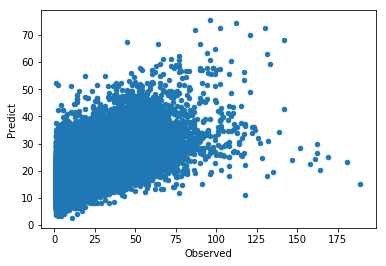

In [139]:
df_valid[df_valid.Observed < 200].plot(x = "Observed", y = "Predict", kind = "scatter")

In [140]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_valid.Observed, df_valid.Predict)

180.94757163580755

In [143]:
X_test = df_test.values
model_xgb.predict(X_test)

array([15.830461 , 21.903467 , 24.92222  , ...,  5.3805504,  6.2652087,
        7.2526937], dtype=float32)

In [151]:
df_submission['visitors'] = model_xgb.predict(X_test)
df_submission['visitors']= df_submission['visitors'].apply(lambda x: round(x))

In [153]:
df_submission[['id','visitors']].to_csv('submission_v1.csv', index=False)